Bankruptcy Prediction Model Using Deep Learning

1. Objective to be achieved:

Main Objective: Predict the probability of a company going bankrupt based on the data provided.
Additional Goals:
Understand the key factors that influence a company's bankruptcy risk.
Optimize the prediction model through hyperparameter tuning to get better accuracy.
Deploy optimized models in production environments so they can be used for real-time analysis.
2. Problem statement:

In an era of increasingly sophisticated stock trading, the ability of investment companies to understand and predict the risk of bankruptcy of a company is not only a competitive advantage but also a necessity. for an Investment Company, understands the importance of digging this information in depth. Protecting our clients' investments, as well as ensuring creditors, employees and management of the companies we invest in have a clear picture of their financial health is a top business priority.

i. Introduction

In [698]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

iii. Data Loading

In [699]:
# loud the data
dataset=pd.read_csv("data.csv")
dataset

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [700]:
#Display the first 5 rows
dataset.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [701]:
#Display the last 5 rows
dataset.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

In [702]:
#Display a random sample of rows
dataset.sample()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
2982          0                                           0.470921          

       ROA(A) before interest and % after tax  \
2982                                  0.53865   

       ROA(B) before interest and depreciation after tax  \
2982                                            0.52551    

       Operating Gross Margin   Realized Sales Gross Margin  \
2982                 0.615763                      0.615763   

       Operating Profit Rate   Pre-tax net Interest Rate  \
2982                0.998978                    0.797387   

       After-tax net Interest Rate  \
2982                      0.809317   

       Non-industry income and expenditure/revenue  ...  \
2982                                      0.303501  ...   

       Net Income to Total Assets   Total assets to GNP price  \
2982                     0.798415                    0.007157   

       No-credit Interval   Gross Profit to Sales  \
2982             0.623693                0.615762   

       Net Income to Stockholder's Equity   Liability to Equity  \
2982                             0.840221              0.278629   

       Degree of Financial Leverage (DFL)  \
2982                             0.028852   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
2982                                           0.568489                   1   

       Equity to Liability  
2982              0.034756  

[1 rows x 96 columns]

In [703]:
# the dataset shape
dataset.shape
print('The Number of Coulmns (Features) :', dataset.shape[1])

print('The Number of Rows (Records ) :', dataset.shape[0])

The Number of Coulmns (Features) : 96
The Number of Rows (Records ) : 6819


iv. Exploratory Data Analysis (EDA)

In [704]:
dataset.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [705]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Looking from 'data.info()' that dataset has mostly "float64" data. Categorical data is differentiated as binary numbers 1 and 0, so it is stored as type "int64". So we will separate numerical and categorical data to analyze the data set.

In [706]:
dataset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [707]:
# Remove whitespace from all columns
dataset.columns = dataset.columns.str.strip()

In [708]:
# Changed the Bankrupt column name to make input easier
dataset = dataset.rename(columns={'Bankrupt?': 'Bankrupt'})

In [709]:
dataset.describe()

Bankrupt  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Net Income to Total Assets  Total assets to GNP price  \
count                 6819.000000               6.819000e+03   
mean                     0.807760               1.862942e+07   
std                      0.040332               3.764501e+08   
min                      0.000000               0.000000e+00   
25%                      0.79

In [710]:
#Check for null values 
dataset.isnull().sum()

Bankrupt                                                   0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [711]:
 print("Total number of columns with missing values :",dataset.isnull().sum().sum())

Total number of columns with missing values : 0


In [712]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [713]:
#Check for null values 
dataset.duplicated().sum()

0

In [714]:
 print("Total number of columns with duplicated values :",dataset.duplicated().sum())

Total number of columns with duplicated values : 0


In [715]:
# select columns that are not numeric columns
non_numeric_columns = dataset.select_dtypes(exclude=['number'])

# Check if there are columns that are not numeric columns
if not non_numeric_columns.empty:
     print("Non-numeric columns:")
     print(non_numeric_columns.columns)
else:
     print("All columns are numerical.")

All columns are numerical.


In [716]:
# if the dtype is INT64 then it is considered a categorical number
numeric_columns = dataset.dtypes[dataset.dtypes != 'int64'].index
categorical_columns = dataset.dtypes[dataset.dtypes == 'int64'].index

dataset[categorical_columns].columns.tolist()

['Bankrupt', 'Liability-Assets Flag', 'Net Income Flag']

There are only three categorical data columns, we will explore these columns first

Target Class Distribution ('Bankrupt')

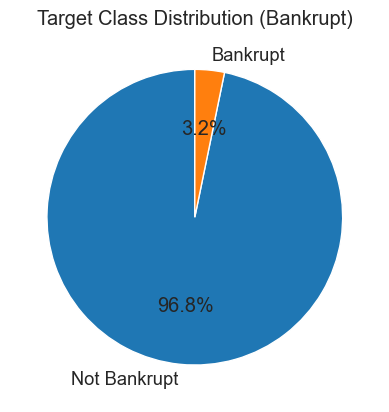

Bankrupt
0    6599
1     220
Name: count, dtype: int64


In [717]:
# Create a pie chart
dataset['Bankrupt'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Not Bankrupt', 'Bankrupt'])
plt.title('Target Class Distribution (Bankrupt)')
plt.ylabel('') # Remove the 'Amount' label as it is not relevant for pie charts
plt.show()

# Displays value counts
print(dataset['Bankrupt'].value_counts())

In [602]:
# checking to see if the classes in the dataset are imbalanced

p = 1-(len(dataset[dataset['Bankrupt']==1])/len(dataset))
print(f"Percentage of non-bankrupt companies: {100*p:>8f}%")

Percentage of non-bankrupt companies: 96.773720%


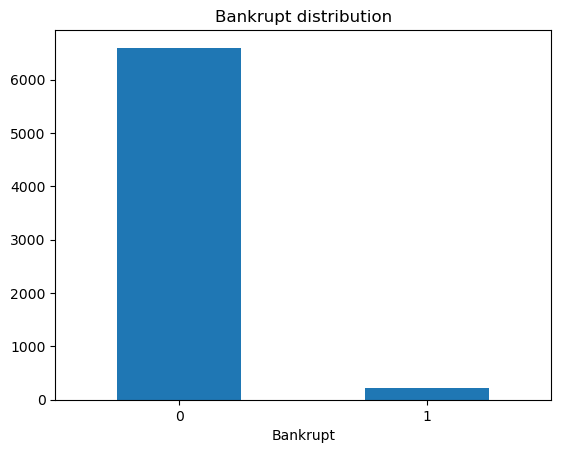

Bankrupt Distribution



In [603]:
custom_colors = ['#ff9999', '#66b3ff']
dataset['Bankrupt'].value_counts().plot.bar(y='Bankrupt', rot=0)
plt.title("Bankrupt distribution")
plt.show()
print("Bankrupt Distribution\n")

Liability-Assets Flag

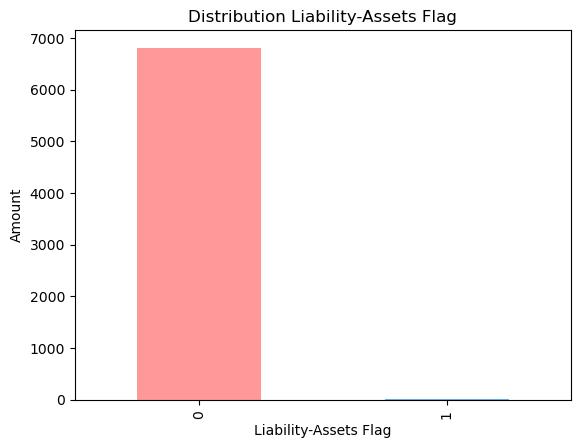

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

In [604]:
dataset['Liability-Assets Flag'].value_counts().plot(kind='bar',color=custom_colors)
plt.title('Distribution Liability-Assets Flag')
plt.xlabel('Liability-Assets Flag')
plt.ylabel('Amount')
plt.show()

dataset['Liability-Assets Flag'].value_counts()

The "Liability-Assets Flag" shows the status of an organization, where if total liabilities exceed total assets, the marked value is 1, otherwise the value is 0. Often, an organization/company's assets are greater than its liabilities.

In [605]:
colors = ["Greys" , "Reds" , "Greens" , "Blues" , "Oranges" , "Purples" , "BuGn" , "BuPu" , "GnBu" , "OrRd" , "PuBu" , "PuRd" , "RdPu" , "YlGn" , "PuBuGn" , "YlGnBu"]

In [606]:
value = randint(0, len(colors)-1)
print(dataset[['Liability-Assets Flag','Bankrupt']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt',data = dataset,palette = colors[value])

NameError: name 'randint' is not defined

In [607]:
from random import random
from random import randint

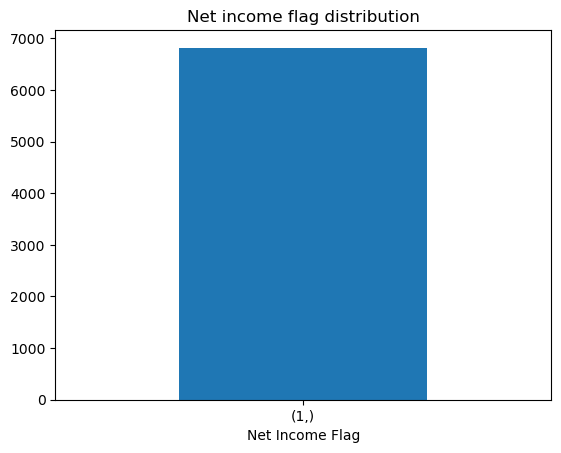

Net Income Flag Distribution

Net Income Flag
1                  6819
Name: count, dtype: int64


In [608]:
pd.DataFrame(dataset['Net Income Flag']).value_counts().plot.bar(y='Net Income Flag', rot=0)
plt.title("Net income flag distribution")
plt.show()
print("Net Income Flag Distribution\n")
print(pd.DataFrame(dataset['Net Income Flag']).value_counts())

Net Income Flag  Bankrupt
1                0           6599
                 1            220
Name: count, dtype: int64


<Axes: xlabel='Net Income Flag', ylabel='count'>

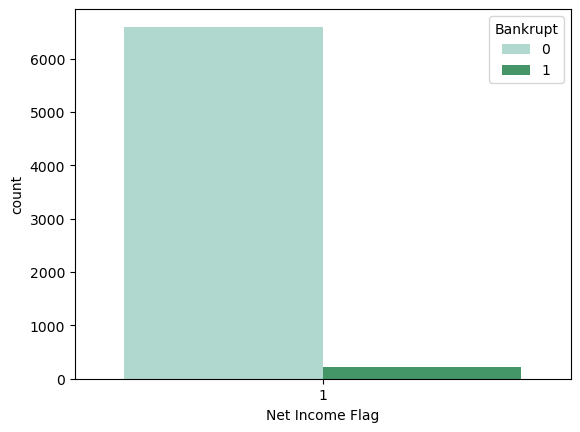

In [609]:
value = randint(0, len(colors)-1)

print(dataset[['Net Income Flag','Bankrupt']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt',data = dataset,palette = colors[value])

In [718]:
x=dataset.drop(columns=['Bankrupt'])
x

ROA(C) before interest and depreciation before interest  \
0                                              0.370594         
1                                              0.464291         
2                                              0.426071         
3                                              0.399844         
4                                              0.465022         
...                                                 ...         
6814                                           0.493687         
6815                                           0.475162         
6816                                           0.472725         
6817                                           0.506264         
6818                                           0.493053         

      ROA(A) before interest and % after tax  \
0                                   0.424389   
1                                   0.538214   
2                                   0.499019   
3                                   0.451265   
4                                   0.538432   
...                                      ...   
6814                                0.539468   
6815                                0.538269   
6816                                0.533744   
6817                                0.559911   
6818                                0.570105   

      ROA(B) before interest and depreciation after tax  \
0                                              0.405750   
1                                              0.516730   
2                                              0.472295   
3                                              0.457733   
4                                              0.522298   
...                                                 ...   
6814                                           0.543230   
6815                                           0.524172   
6816                                           0.520638   
6817                                           0.554045   
6818                                           0.549548   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                   0.601457                     0.601457   
1                   0.610235                     0.610235   
2                   0.601450                     0.601364   
3                   0.583541                     0.583541   
4                   0.598783                     0.598783   
...                      ...                          ...   
6814                0.604455                     0.604462   
6815                0.598308                     0.598308   
6816                0.610444                     0.610213   
6817                0.607850                     0.607850   
6818                0.627409                     0.627409   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.998969                   0.796887   
1                  0.998946                   0.797380   
2                  0.998857                   0.796403   
3                  0.998700                   0.796967   
4                  0.998973                   0.797366   
...                     ...                        ...   
6814               0.998992                   0.797409   
6815               0.998992                   0.797414   
6816               0.998984                   0.797401   
6817               0.999074                   0.797500   
6818               0.998080                   0.801987   

      After-tax net Interest Rate  \
0                        0.808809   
1                        0.809301   
2                        0.808388   
3                        0.808966   
4                        0.809304   
...                           ...   
6814                     0.809331   
6815                     0.809327   
6816                     0.809317   
6817                     0.809399   
6818                     0.813800   

      Non-industry income and expenditure/revenue  \
0          

In [719]:
y=dataset['Bankrupt']
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

# feature selection 
1. Correlation checking

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score


In [12]:
from sklearn.feature_selection import RFE

selected feature 2

In [145]:
x_new =new_dataset .drop(columns=['Bankrupt'])
x_new

Net Income to Stockholder's Equity  Net Value Growth Rate  \
0                               0.827890               0.000327   
1                               0.839969               0.000443   
2                               0.836774               0.000396   
3                               0.834697               0.000382   
4                               0.839973               0.000439   
...                                  ...                    ...   
6814                            0.840359               0.000450   
6815                            0.840306               0.000445   
6816                            0.840138               0.000435   
6817                            0.841084               0.000529   
6818                            0.841019               0.000519   

      Borrowing dependency  Working Capital/Equity  \
0                 0.390284                0.721275   
1                 0.376760                0.731975   
2                 0.379093                0.742729   
3                 0.379743                0.729825   
4                 0.375025                0.732000   
...                    ...                     ...   
6814              0.373823                0.736716   
6815              0.372505                0.734584   
6816              0.369637                0.737432   
6817              0.369649                0.736713   
6818              0.370049                0.737286   

      Persistent EPS in the Last Four Seasons  Net Income to Total Assets  \
0                                    0.169141                    0.716845   
1                                    0.208944                    0.795297   
2                                    0.180581                    0.774670   
3                                    0.193722                    0.739555   
4                                    0.212537                    0.795016   
...                                       ...                         ...   
6814                                 0.216602                    0.799927   
6815                                 0.216697                    0.799748   
6816                                 0.210929                    0.797778   
6817                                 0.228326                    0.811808   
6818                                 0.227758                    0.815956   

      Net profit before tax/Paid-in capital  Interest Expense Ratio  \
0                                  0.137757                0.629951   
1                                  0.168962                0.635172   
2                                  0.148036                0.629631   
3                                  0.147561                0.630228   
4                                  0.167461                0.636055   
...                                     ...                     ...   
6814                               0.171111                0.631415   
6815                               0.171805                0.631489   
6816                               0.172287                0.630612   
6817                               0.182498                0.630731   
6818                               0.179911                0.630618   

      Degree of Financial Leverage (DFL)  Net Value Per Share (A)  ...  \
0                               0.026601                 0.147950  ...   
1                               0.264577                 0.182251  ...   
2                               0.026555                 0.177911  ...   
3                               0.026697                 0.154187  ...   
4                               0.024752                 0.167502  ...   
...                                  ...                      ...  ...   
6814                            0.027064                 0.175045  ...   
6815                            0.027009                 0.181324  ...   
6816                            0.026791                 0.269521  ...   
6817                            0.

In [146]:
y_new=new_dataset ['Bankrupt']
y_new

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

# feature selection 3 

In [619]:
numeric = dataset.dtypes[dataset.dtypes != 'int64'].index.to_list()

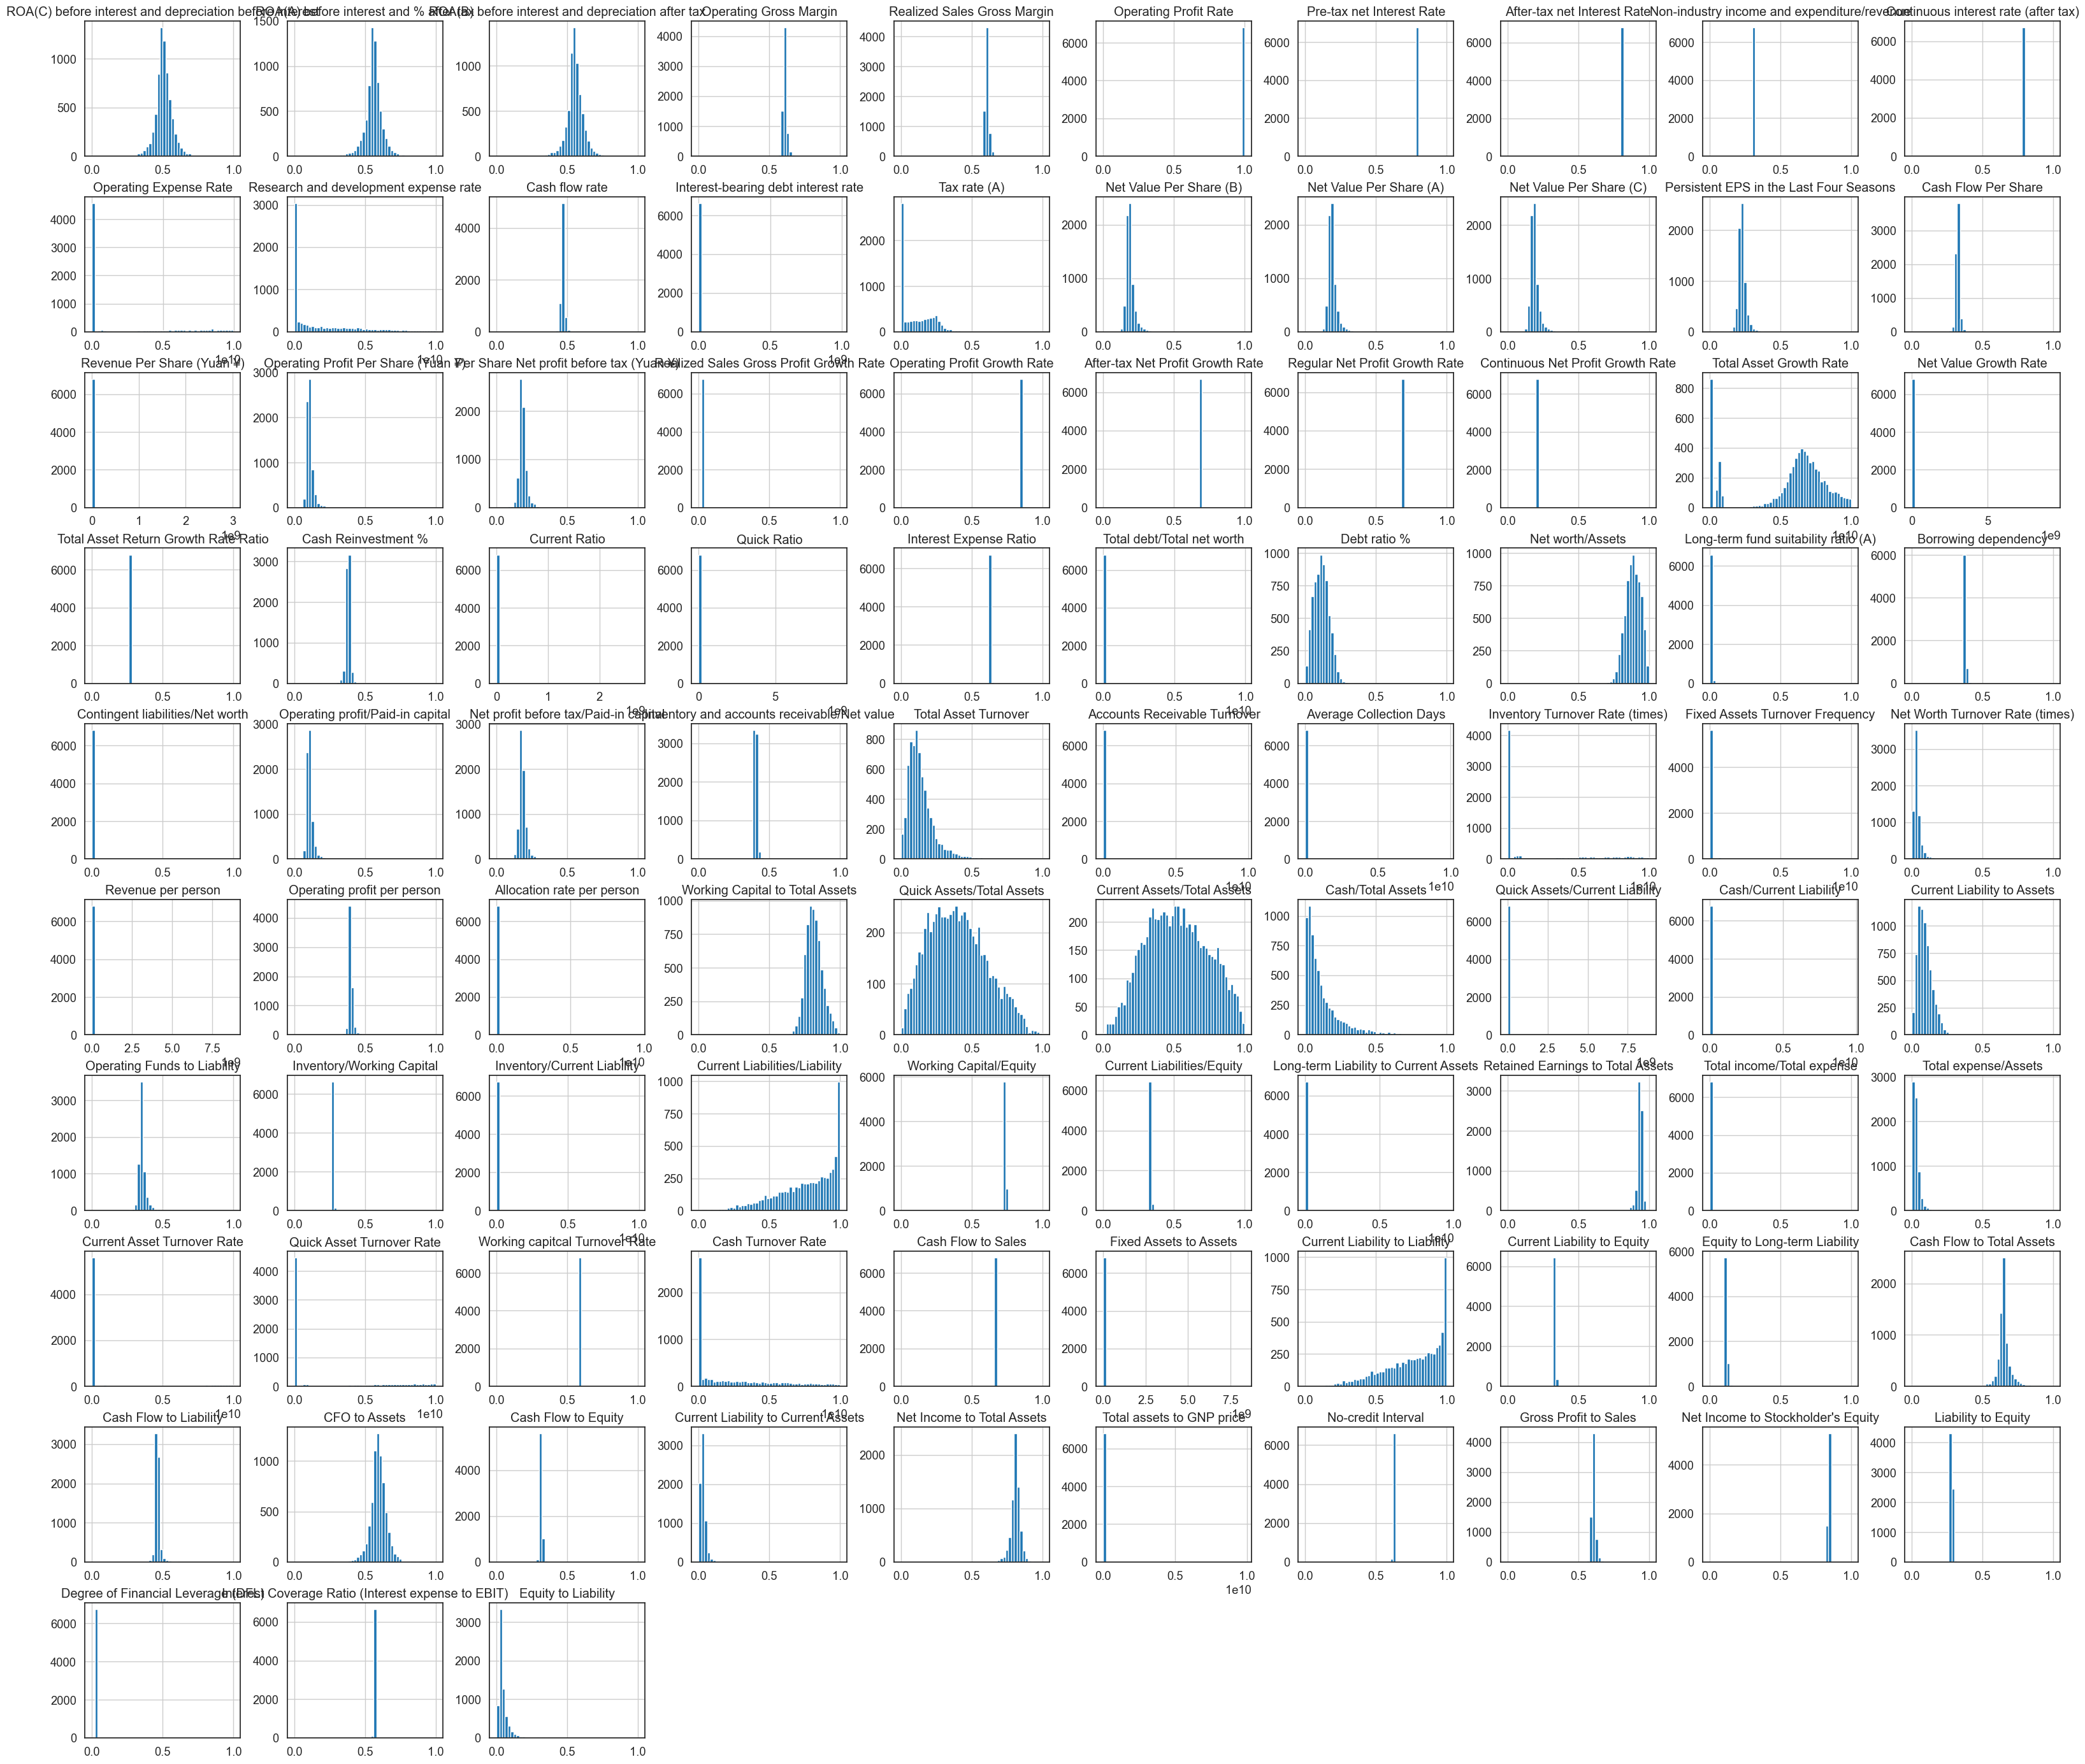

In [620]:
# Looking at the histograms of numerical data

dataset[numeric].hist(figsize = (40,35), bins = 50)
plt.show()

In [672]:
# training set
X = dataset.drop(columns=['Bankrupt'])
y = dataset['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [119]:
# determining optimal number of features
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=15), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

Test score: 0.966  number of features: 5
Test score: 0.970  number of features: 10
Test score: 0.970  number of features: 15
Test score: 0.972  number of features: 20
Test score: 0.971  number of features: 25
Test score: 0.971  number of features: 30
Test score: 0.974  number of features: 35
Test score: 0.970  number of features: 40


In [695]:
X = dataset.drop(columns=['Bankrupt'])
y = dataset['Bankrupt']

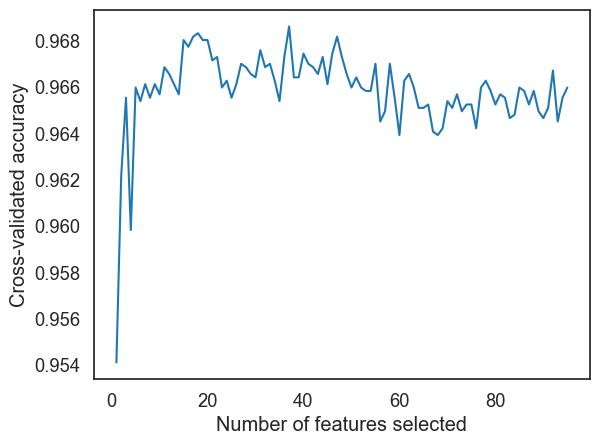

Optimal number of features: 37


In [628]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold


rf_classifier = RandomForestClassifier()

rfecv_selector = RFECV(estimator=rf_classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv_selector = rfecv_selector.fit(x, y)

# Plot number of features vs. cross-validated performance
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validated accuracy")

# Check scikit-learn version for correct attribute access
try:
    scores = rfecv_selector.grid_scores_
except AttributeError:
    scores = rfecv_selector.cv_results_['mean_test_score']

plt.plot(range(1, len(scores) + 1), scores)
plt.show()

# Print the optimal number of features
optimal_num_features = rfecv_selector.n_features_
print(f"Optimal number of features: {optimal_num_features}")

In [966]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def select_best_features(dataset, target_column, k=37):
   
    X = dataset.drop(columns=['Bankrupt'])
    y = dataset['Bankrupt']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use a classifier to get feature importances
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    feature_importances = clf.feature_importances_

   
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

   
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Select the top 15 features
    selected_features = feature_importance_df.head(37)['Feature'].tolist()


    return selected_features

selected_features = select_best_features(dataset, target_column='Bankrupt', k=37)
print("Selected Features:", selected_features)

Selected Features: ["Net Income to Stockholder's Equity", 'Net Value Growth Rate', 'Borrowing dependency', 'Working Capital/Equity', 'Persistent EPS in the Last Four Seasons', 'Net Income to Total Assets', 'Net profit before tax/Paid-in capital', 'Interest Expense Ratio', 'Degree of Financial Leverage (DFL)', 'Net Value Per Share (A)', 'Per Share Net profit before tax (Yuan ¥)', 'Total debt/Total net worth', 'Liability to Equity', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Debt ratio %', 'Cash/Total Assets', 'Non-industry income and expenditure/revenue', 'Net worth/Assets', 'Interest-bearing debt interest rate', 'Net Value Per Share (C)', 'Cash/Current Liability', 'Inventory/Working Capital', 'Net Value Per Share (B)', 'ROA(B) before interest and depreciation after tax', 'Total income/Total expense', 'Continuous interest rate (after tax)', 'Fixed Assets Turnover Frequency', 'ROA(A) before interest and % after tax', 'No-credit Interval', 'Accounts Receivable Turnover', 'Inve

In [967]:
selected_features

["Net Income to Stockholder's Equity",
 'Net Value Growth Rate',
 'Borrowing dependency',
 'Working Capital/Equity',
 'Persistent EPS in the Last Four Seasons',
 'Net Income to Total Assets',
 'Net profit before tax/Paid-in capital',
 'Interest Expense Ratio',
 'Degree of Financial Leverage (DFL)',
 'Net Value Per Share (A)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Total debt/Total net worth',
 'Liability to Equity',
 'Interest Coverage Ratio (Interest expense to EBIT)',
 'Debt ratio %',
 'Cash/Total Assets',
 'Non-industry income and expenditure/revenue',
 'Net worth/Assets',
 'Interest-bearing debt interest rate',
 'Net Value Per Share (C)',
 'Cash/Current Liability',
 'Inventory/Working Capital',
 'Net Value Per Share (B)',
 'ROA(B) before interest and depreciation after tax',
 'Total income/Total expense',
 'Continuous interest rate (after tax)',
 'Fixed Assets Turnover Frequency',
 'ROA(A) before interest and % after tax',
 'No-credit Interval',
 'Accounts Receivable Turnov

In [968]:
feature_importance_df 

Feature  Importance
29                    Net Value Growth Rate    0.037142
39                     Borrowing dependency    0.027248
18  Persistent EPS in the Last Four Seasons    0.022795
89       Net Income to Stockholder's Equity    0.022316
42    Net profit before tax/Paid-in capital    0.021995
..                                      ...         ...
67        Retained Earnings to Total Assets    0.006010
40         Contingent liabilities/Net worth    0.004469
14                             Tax rate (A)    0.001769
84                    Liability-Assets Flag    0.000000
93                          Net Income Flag    0.000000

[95 rows x 2 columns]

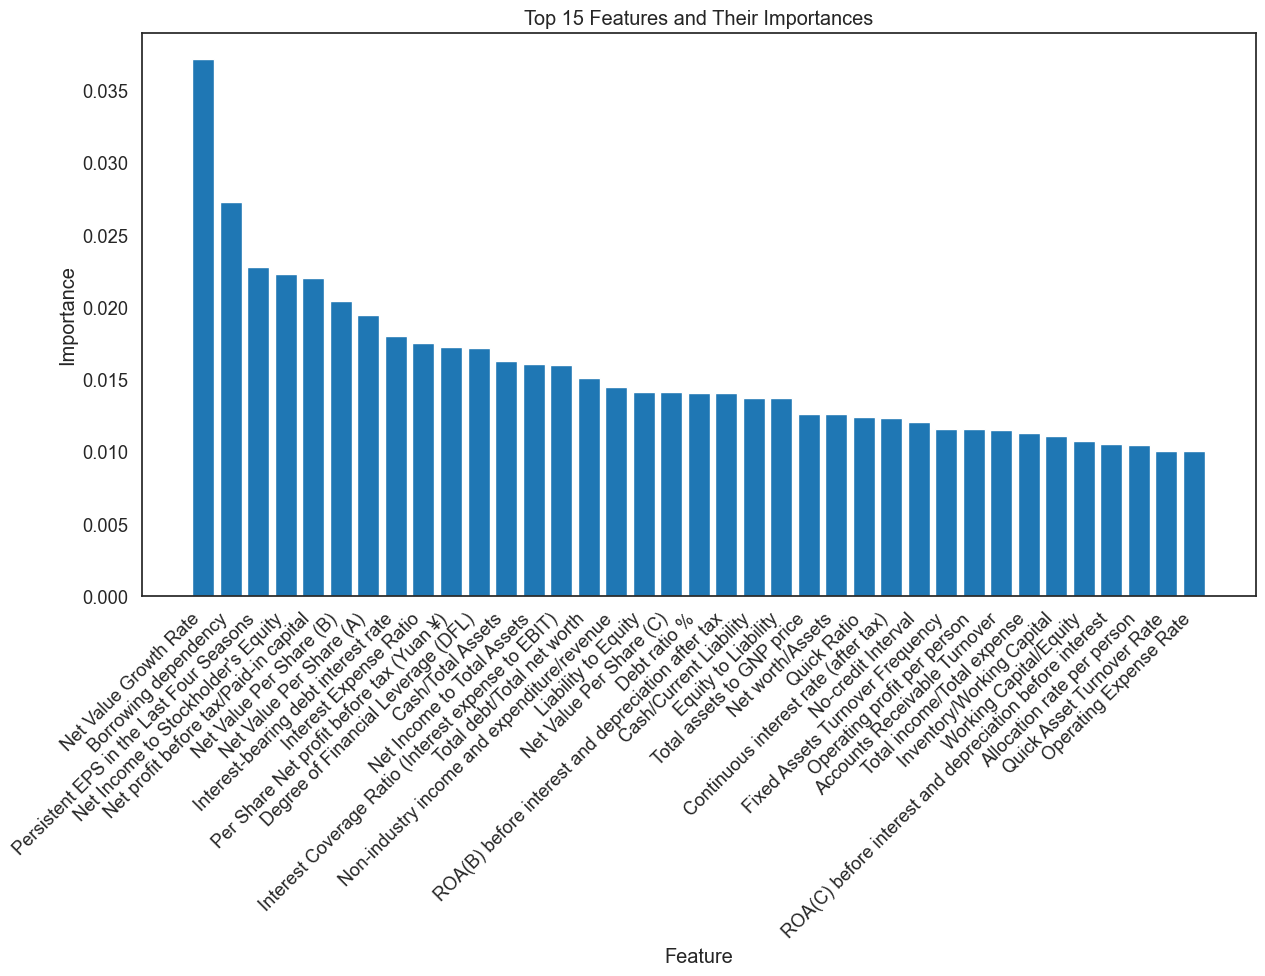

In [970]:
plt.figure(figsize=(13,10))
plt.bar(feature_importance_df['Feature'][:37],feature_importance_df ['Importance'][:37])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Top 15 Features and Their Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [971]:
new_dataset= dataset[selected_features + ['Bankrupt']] 

In [972]:
new_dataset

Net Income to Stockholder's Equity  Net Value Growth Rate  \
0                               0.827890               0.000327   
1                               0.839969               0.000443   
2                               0.836774               0.000396   
3                               0.834697               0.000382   
4                               0.839973               0.000439   
...                                  ...                    ...   
6814                            0.840359               0.000450   
6815                            0.840306               0.000445   
6816                            0.840138               0.000435   
6817                            0.841084               0.000529   
6818                            0.841019               0.000519   

      Borrowing dependency  Working Capital/Equity  \
0                 0.390284                0.721275   
1                 0.376760                0.731975   
2                 0.379093                0.742729   
3                 0.379743                0.729825   
4                 0.375025                0.732000   
...                    ...                     ...   
6814              0.373823                0.736716   
6815              0.372505                0.734584   
6816              0.369637                0.737432   
6817              0.369649                0.736713   
6818              0.370049                0.737286   

      Persistent EPS in the Last Four Seasons  Net Income to Total Assets  \
0                                    0.169141                    0.716845   
1                                    0.208944                    0.795297   
2                                    0.180581                    0.774670   
3                                    0.193722                    0.739555   
4                                    0.212537                    0.795016   
...                                       ...                         ...   
6814                                 0.216602                    0.799927   
6815                                 0.216697                    0.799748   
6816                                 0.210929                    0.797778   
6817                                 0.228326                    0.811808   
6818                                 0.227758                    0.815956   

      Net profit before tax/Paid-in capital  Interest Expense Ratio  \
0                                  0.137757                0.629951   
1                                  0.168962                0.635172   
2                                  0.148036                0.629631   
3                                  0.147561                0.630228   
4                                  0.167461                0.636055   
...                                     ...                     ...   
6814                               0.171111                0.631415   
6815                               0.171805                0.631489   
6816                               0.172287                0.630612   
6817                               0.182498                0.630731   
6818                               0.179911                0.630618   

      Degree of Financial Leverage (DFL)  Net Value Per Share (A)  ...  \
0                               0.026601                 0.147950  ...   
1                               0.264577                 0.182251  ...   
2                               0.026555                 0.177911  ...   
3                               0.026697                 0.154187  ...   
4                               0.024752                 0.167502  ...   
...                                  ...                      ...  ...   
6814                            0.027064                 0.175045  ...   
6815                            0.027009                 0.181324  ...   
6816                            0.026791                 0.269521  ...   
6817                            0.

In [973]:
new_dataset.columns

Index(['Net Income to Stockholder's Equity', 'Net Value Growth Rate',
       'Borrowing dependency', 'Working Capital/Equity',
       'Persistent EPS in the Last Four Seasons', 'Net Income to Total Assets',
       'Net profit before tax/Paid-in capital', 'Interest Expense Ratio',
       'Degree of Financial Leverage (DFL)', 'Net Value Per Share (A)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Total debt/Total net worth', 'Liability to Equity',
       'Interest Coverage Ratio (Interest expense to EBIT)', 'Debt ratio %',
       'Cash/Total Assets', 'Non-industry income and expenditure/revenue',
       'Net worth/Assets', 'Interest-bearing debt interest rate',
       'Net Value Per Share (C)', 'Cash/Current Liability',
       'Inventory/Working Capital', 'Net Value Per Share (B)',
       'ROA(B) before interest and depreciation after tax',
       'Total income/Total expense', 'Continuous interest rate (after tax)',
       'Fixed Assets Turnover Frequency',
       'ROA(A) b

In [974]:
len(new_dataset.columns)

38

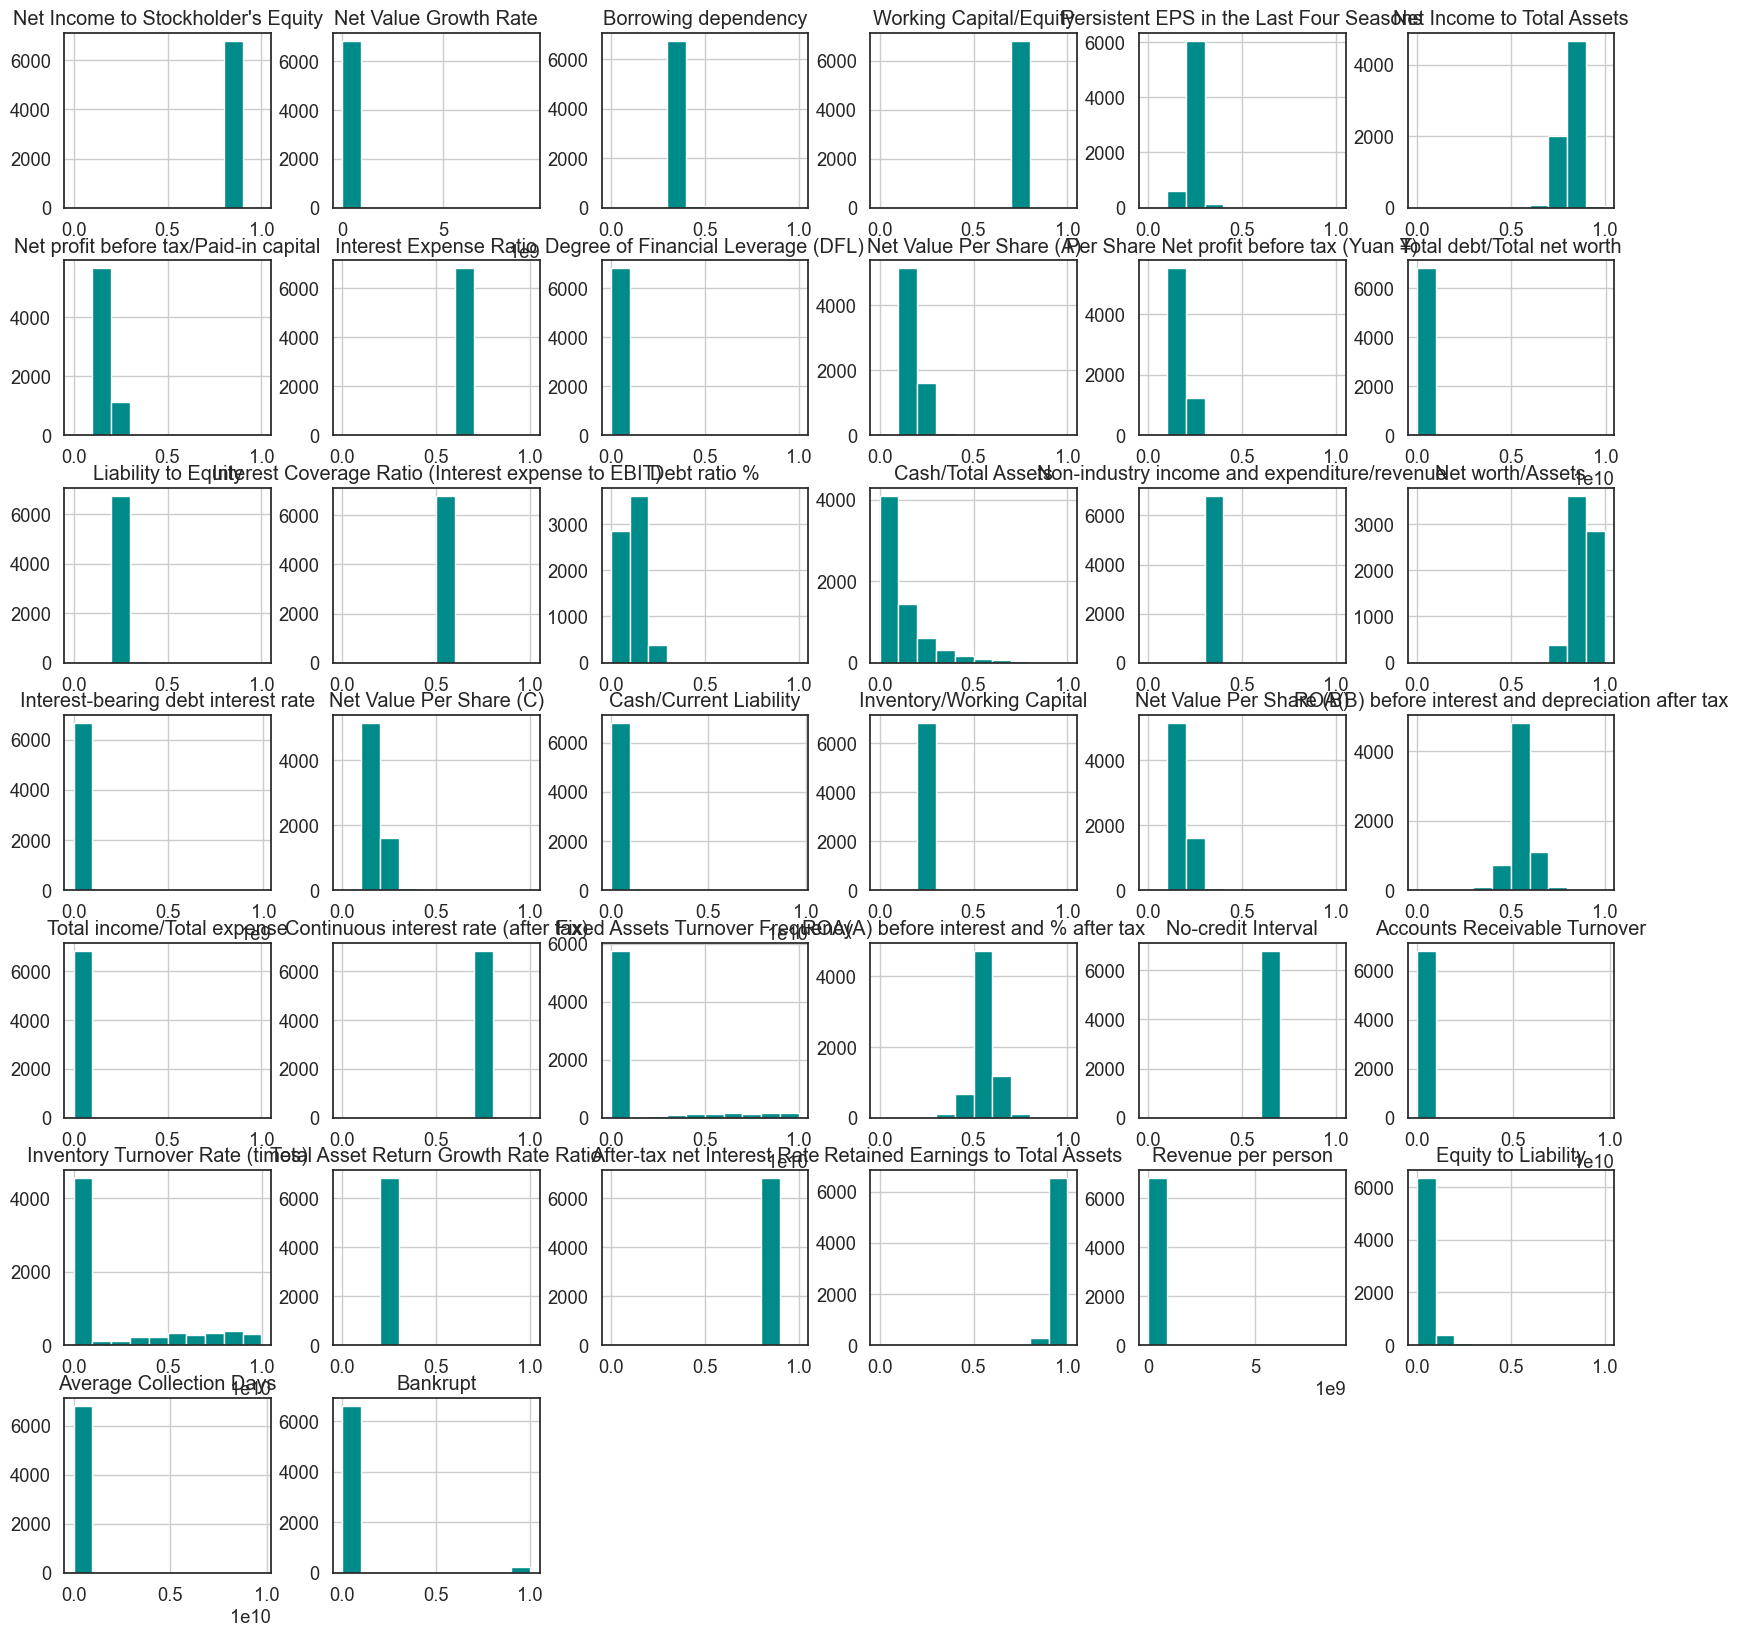

In [1008]:
new_dataset.hist(figsize=(20,20), edgecolor='white',color=['darkcyan'])
plt.show()

<Axes: >

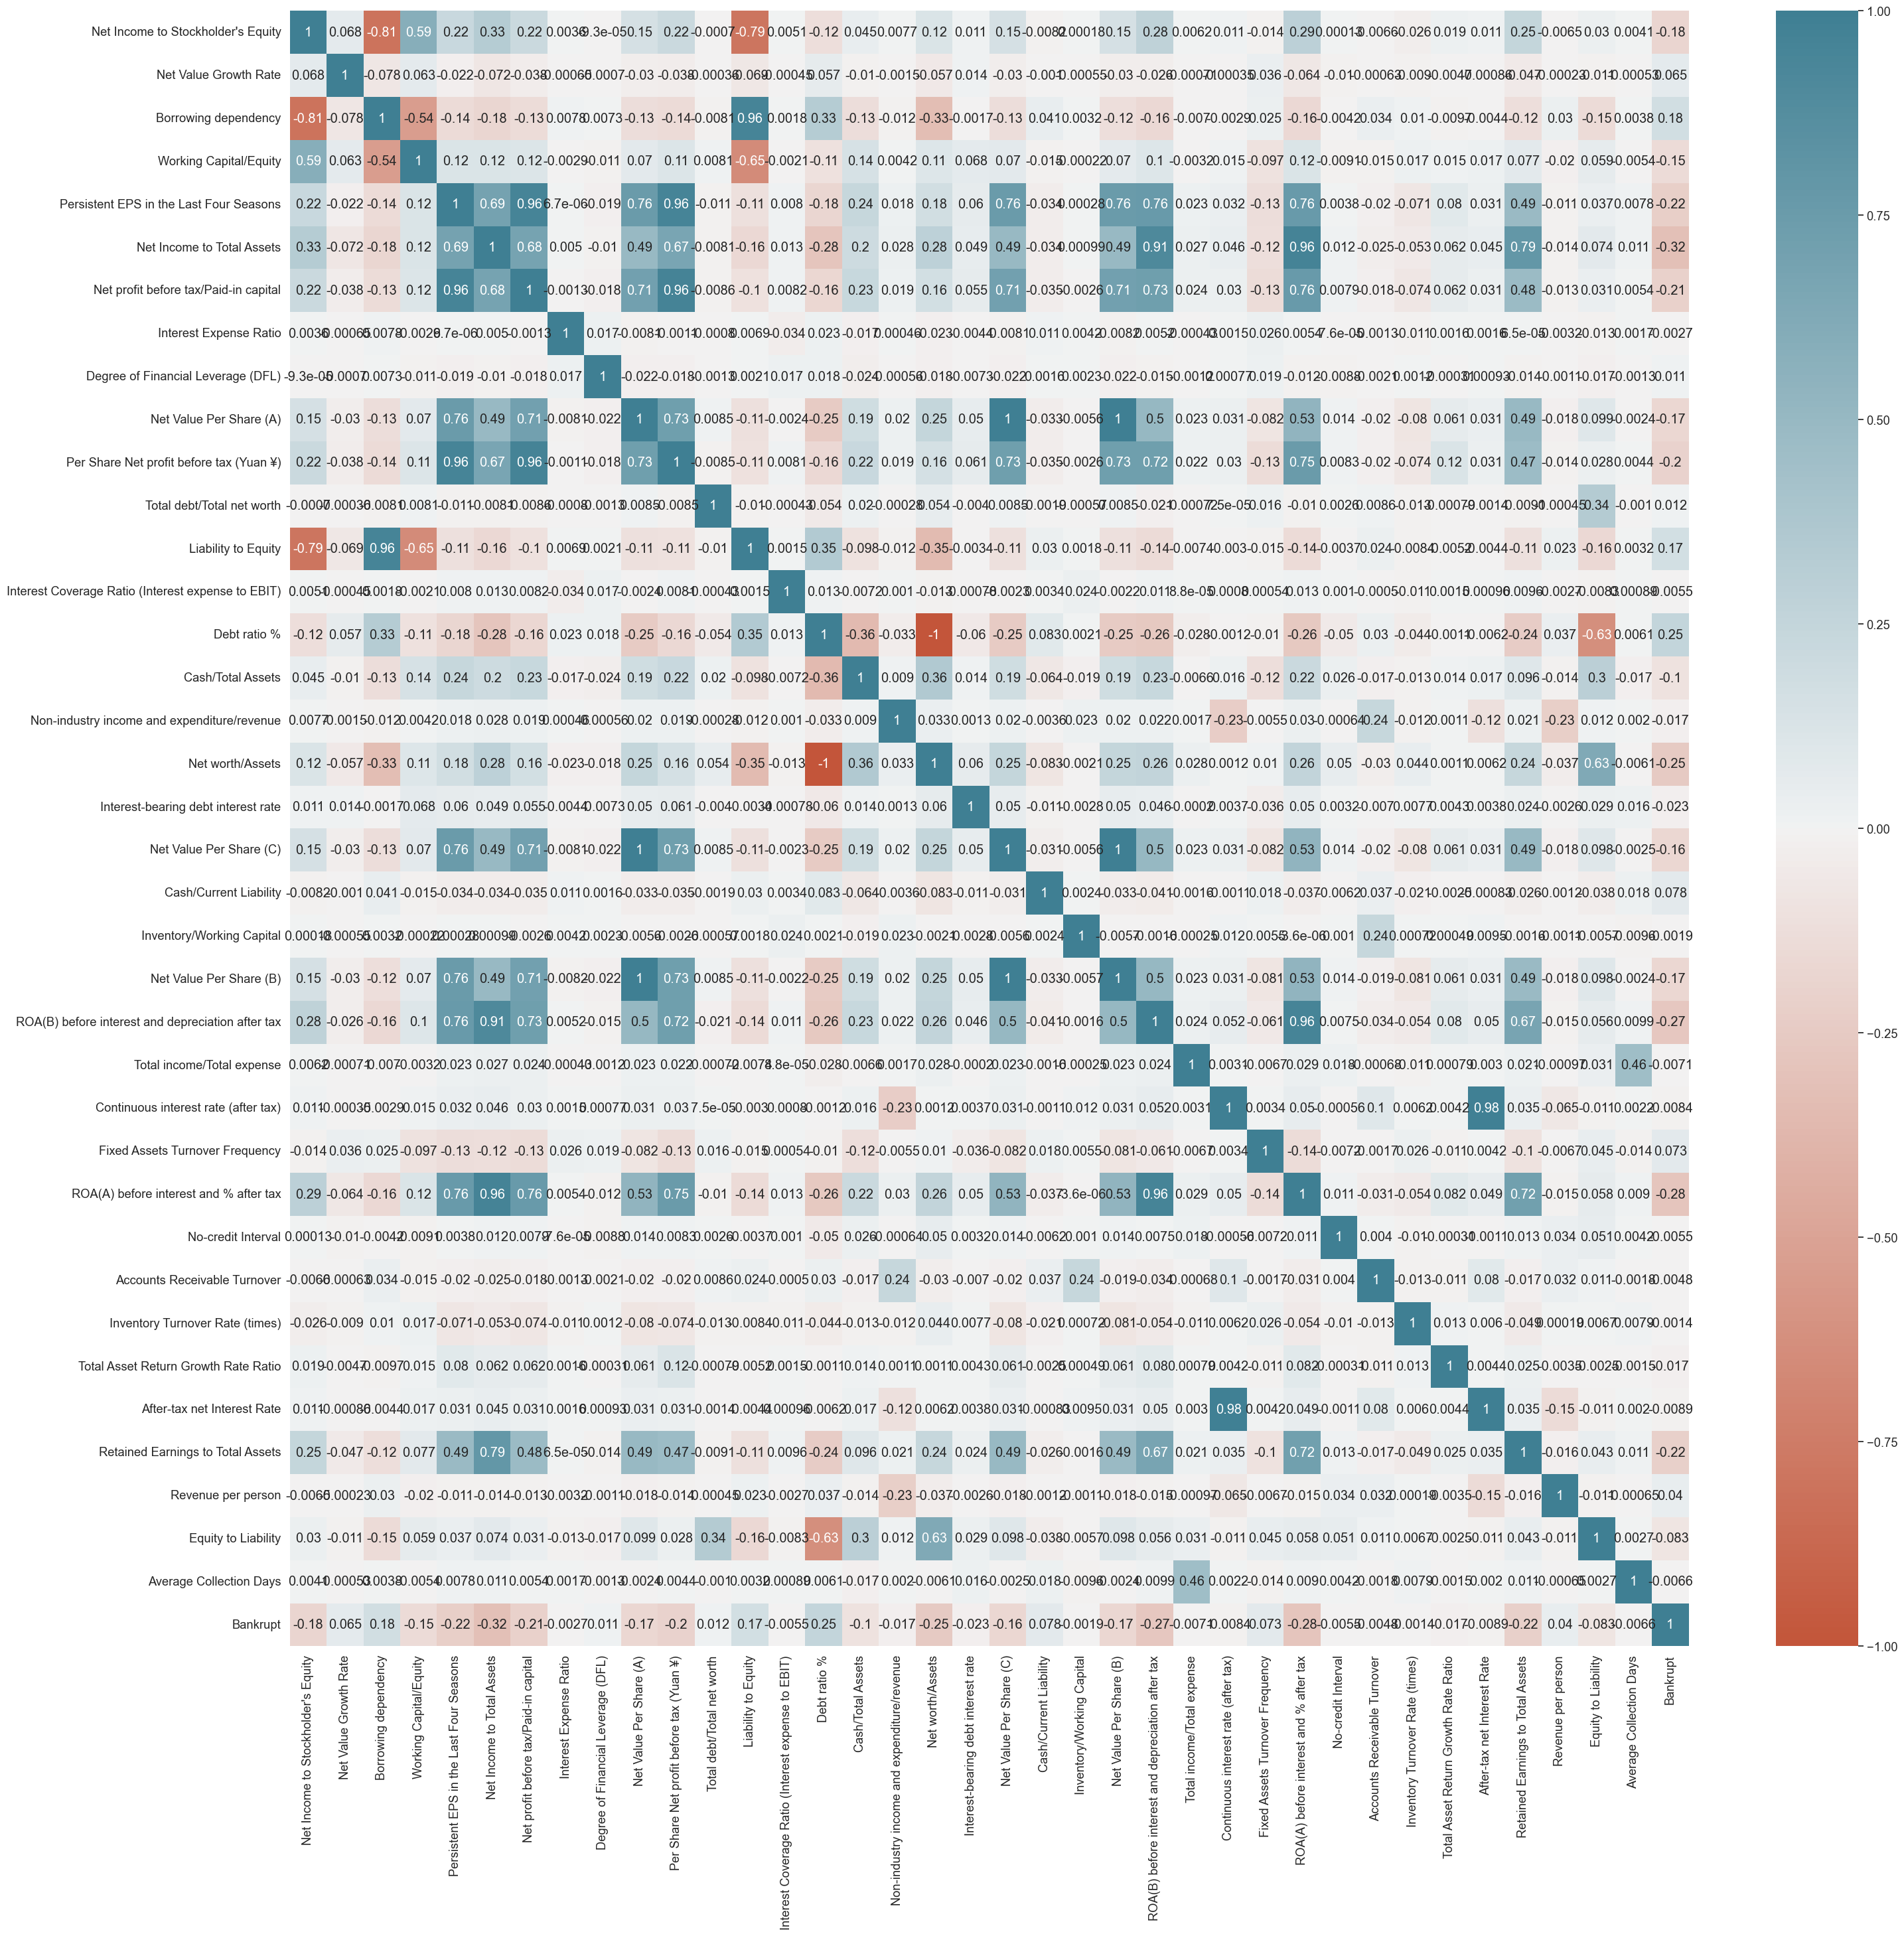

In [1024]:
fig, ax = plt.subplots(figsize=(34,32))

sns.heatmap(new_dataset.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True) 

<Axes: xlabel="Net Income to Stockholder's Equity", ylabel='Borrowing dependency'>

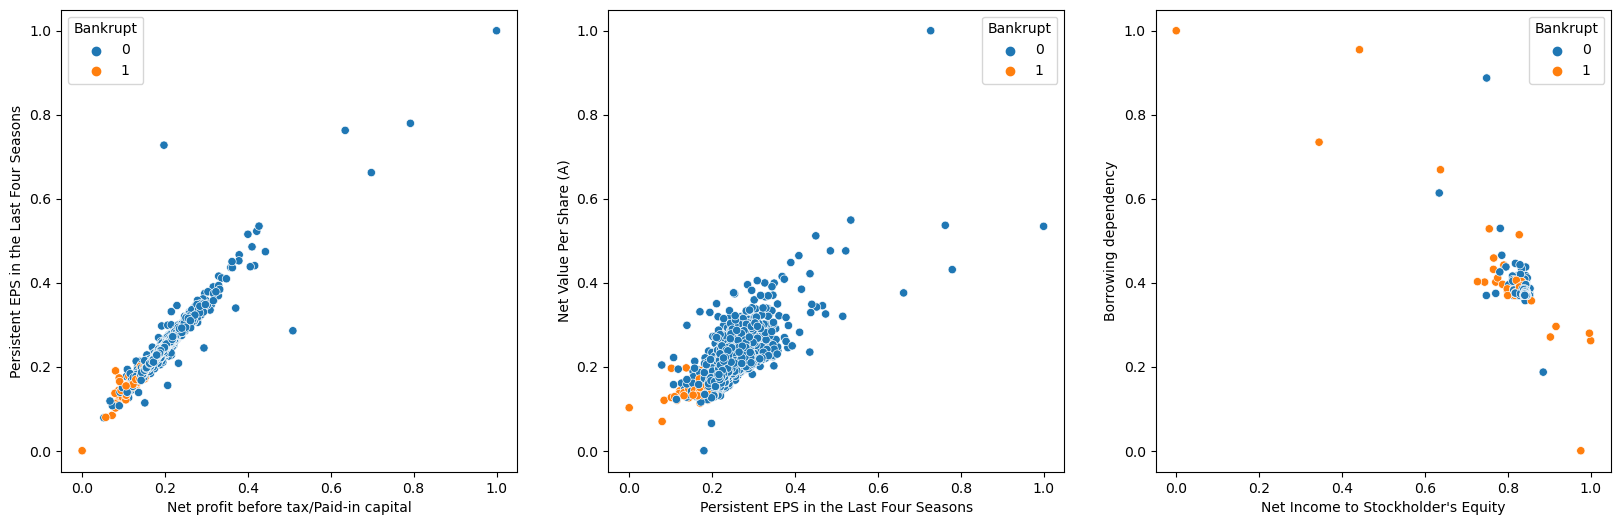

In [497]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

sns.scatterplot(data=datasetnew, x='Net profit before tax/Paid-in capital', y='Persistent EPS in the Last Four Seasons', hue='Bankrupt', ax=ax[0])
sns.scatterplot(data=datasetnew, x='Persistent EPS in the Last Four Seasons', y='Net Value Per Share (A)', hue='Bankrupt', ax=ax[1])
sns.scatterplot(data=datasetnew, x="Net Income to Stockholder's Equity", y='Borrowing dependency', hue='Bankrupt', ax=ax[2])

We start to see some patterns

companies with a low 'Net profit before tax/Paid-in capital', 'Persistent EPS in the Last Four Seasons' and 'Net Value Per Share (A)' tend to go bankrupt
'Borrowing dependency' has bankrupt companies distributed through all it's range. But, around 0.4, are located the companies that do not go bankrupt. Having around 0.4 doesn't guarantee to be bankrupt safe since there are a lot of companies that went bankrupt with this index, but having a higher o lower index seems to be critical since there aren't any companies operating with this kind of index. Same goes to "Net Income to Stockholder's Equity" but around 0.8

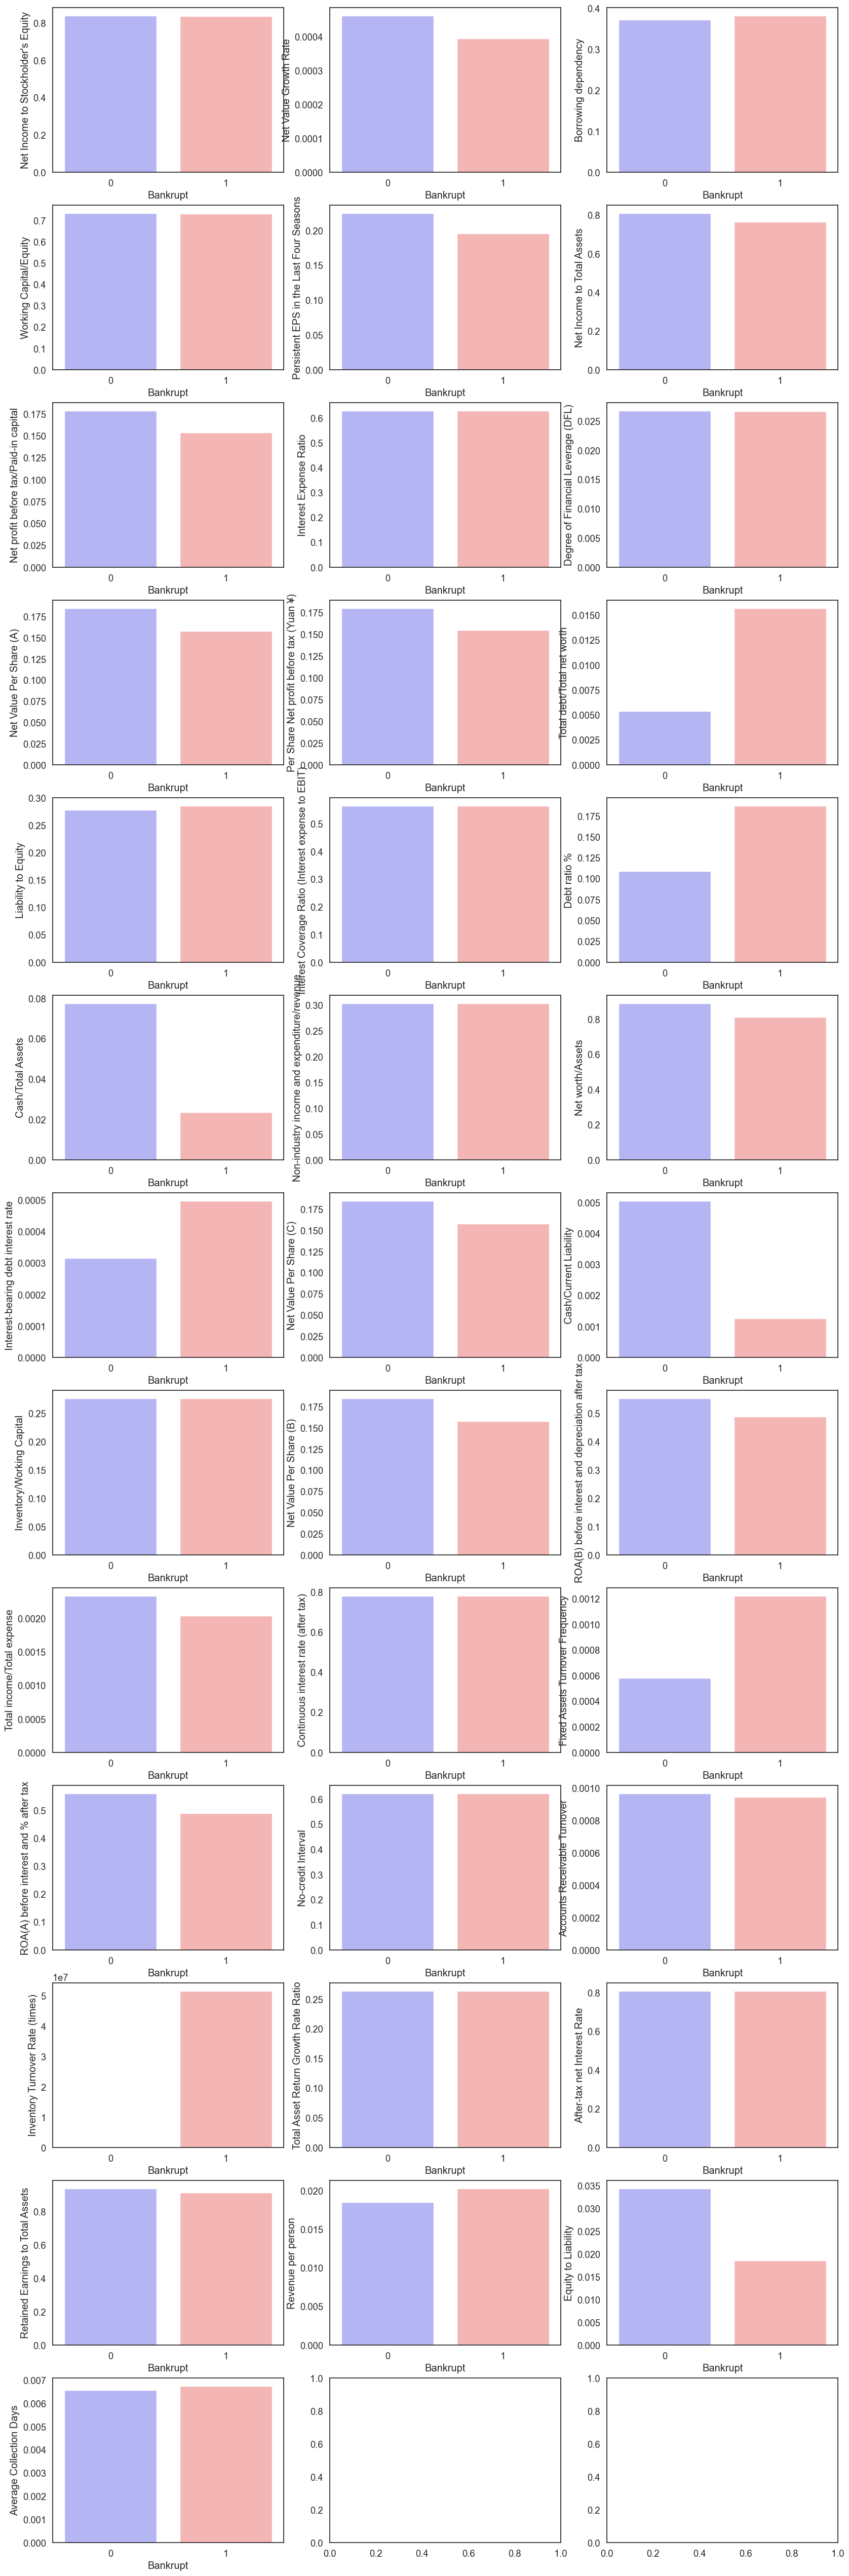

Bankrupt  Net Income to Stockholder's Equity  Net Value Growth Rate  \
0         0                            0.841232               0.000463   
1         1                            0.836707               0.000396   

   Borrowing dependency  Working Capital/Equity  \
0              0.372474                0.736072   
1              0.382655                0.732669   

   Persistent EPS in the Last Four Seasons  Net Income to Total Assets  \
0                                 0.225111                    0.811492   
1                                 0.195944                    0.766297   

   Net profit before tax/Paid-in capital  Interest Expense Ratio  \
0                               0.179021                0.630703   
1                               0.154012                0.630283   

   Degree of Financial Leverage (DFL)  ...  \
0                            0.026810  ...   
1                            0.026689  ...   

   ROA(A) before interest and % after tax  No-credit Interval  \
0                                0.561219            0.623887   
1                                0.490215            0.623555   

   Accounts Receivable Turnover  Inventory Turnover Rate (times)  \
0                      0.000970                     7.335294e-04   
1                      0.000945                     5.160000e+07   

   Total Asset Return Growth Rate Ratio  After-tax net Interest Rate  \
0                              0.264057                     0.809379   
1                              0.263724                     0.809092   

   Retained Earnings to Total Assets  Revenue per person  Equity to Liability  \
0                           0.938058            0.018539             0.034486   
1                           0.912923            0.020299             0.018662   

   Average Collection Days  
0                 0.006570  
1                 0.006757  

[2 rows x 38 columns]

In [1017]:
central = new_dataset.groupby('Bankrupt').median().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(13,3, figsize=(20,65))

ax = ax.ravel()
position = 0

for i in features:
    sns.barplot(data=central, x='Bankrupt', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()
display(central)

Data Analysis Conclusions
Let's mention the most evident tendencies:

Companies with:

high "Interest-bearing debt interest rate" tend to go bankrupt (≈ 0.000499)
high "Total debt/Total net worth" tend to go bankrupt (≈ 0.015723)
high "Fixed Assets Turnover Frequency" tend to go bankrupt (≈ 0.001225)
low "Cash/Total Assets" tend to go bankrupt (≈ 0.023755)
low "Equity to Liability" tend to go bankrupt (≈ 0.018662)
Also, These indicators should be enough to build a reliable model since the trend is very clear. Let's build our model

In [1030]:
x_new = new_dataset.drop(columns=['Bankrupt'])
x_new

Net Income to Stockholder's Equity  Net Value Growth Rate  \
0                               0.827890               0.000327   
1                               0.839969               0.000443   
2                               0.836774               0.000396   
3                               0.834697               0.000382   
4                               0.839973               0.000439   
...                                  ...                    ...   
6814                            0.840359               0.000450   
6815                            0.840306               0.000445   
6816                            0.840138               0.000435   
6817                            0.841084               0.000529   
6818                            0.841019               0.000519   

      Borrowing dependency  Working Capital/Equity  \
0                 0.390284                0.721275   
1                 0.376760                0.731975   
2                 0.379093                0.742729   
3                 0.379743                0.729825   
4                 0.375025                0.732000   
...                    ...                     ...   
6814              0.373823                0.736716   
6815              0.372505                0.734584   
6816              0.369637                0.737432   
6817              0.369649                0.736713   
6818              0.370049                0.737286   

      Persistent EPS in the Last Four Seasons  Net Income to Total Assets  \
0                                    0.169141                    0.716845   
1                                    0.208944                    0.795297   
2                                    0.180581                    0.774670   
3                                    0.193722                    0.739555   
4                                    0.212537                    0.795016   
...                                       ...                         ...   
6814                                 0.216602                    0.799927   
6815                                 0.216697                    0.799748   
6816                                 0.210929                    0.797778   
6817                                 0.228326                    0.811808   
6818                                 0.227758                    0.815956   

      Net profit before tax/Paid-in capital  Interest Expense Ratio  \
0                                  0.137757                0.629951   
1                                  0.168962                0.635172   
2                                  0.148036                0.629631   
3                                  0.147561                0.630228   
4                                  0.167461                0.636055   
...                                     ...                     ...   
6814                               0.171111                0.631415   
6815                               0.171805                0.631489   
6816                               0.172287                0.630612   
6817                               0.182498                0.630731   
6818                               0.179911                0.630618   

      Degree of Financial Leverage (DFL)  Net Value Per Share (A)  ...  \
0                               0.026601                 0.147950  ...   
1                               0.264577                 0.182251  ...   
2                               0.026555                 0.177911  ...   
3                               0.026697                 0.154187  ...   
4                               0.024752                 0.167502  ...   
...                                  ...                      ...  ...   
6814                            0.027064                 0.175045  ...   
6815                            0.027009                 0.181324  ...   
6816                            0.026791                 0.269521  ...   
6817                            0.

In [1031]:
y_new= new_dataset['Bankrupt']
y_new

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

# Train Test SPlit 

In [1034]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [1035]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

# imbalanced data

Imbalanced data refers to a situation in a dataset where the distribution of classes is not equal or nearly equal. In a binary classification problem, imbalance occurs when the number of instances belonging to one class significantly outweighs the number of instances in the other class

 In the categorical data distribution analysis, we came to know that company which are bankrupted are very less compared to non bankrupt companies. Our dataset is a imbalanced dataset.

In [1032]:
import imblearn
from imblearn.over_sampling import SMOTE 

In [1033]:
sm = SMOTE(random_state=42)
x_sm,y_sm= sm.fit_resample(x_new, y_new)

In [981]:
# Standardize the features
scaler = StandardScaler()

In [1036]:
x_train = scaler.fit_transform(x_train)

In [1037]:
x_test = scaler.transform(x_test)

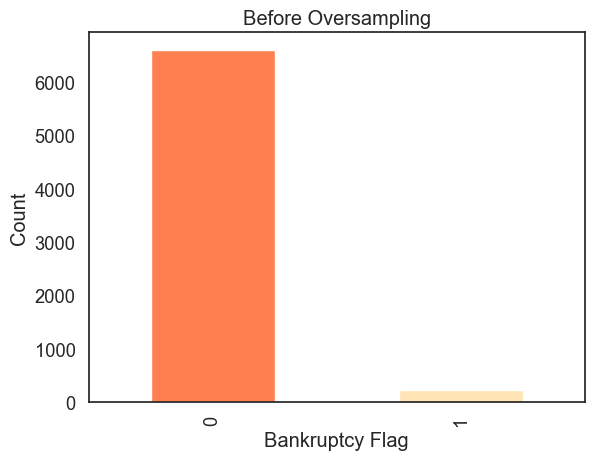

In [1038]:
# Before Oversampling using SMOTE
dataset['Bankrupt'].value_counts().plot(kind="bar",color = ['coral', 'moccasin'])
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("Before Oversampling")
plt.show()

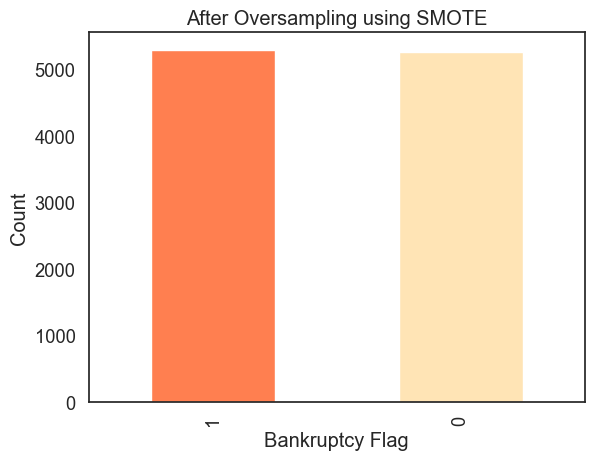

In [1039]:
# After Oversampling using SMOTE
y_train.value_counts().plot(kind="bar",color = ['coral', 'moccasin'])
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

In [1040]:
# Bulding ANN Model

In [1041]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1042]:
# Build the ANN model
model = Sequential()


In [1043]:
# Input layer and first hidden layer
#model.add(Dense(units=15, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=64, activation='relu', input_dim=37))

In [1044]:
# Second hidden layer
#model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=65, activation='relu'))

In [1045]:
# Output layer
#model.add(Dense(units=1, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [1046]:
# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1047]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
330/330 [==============================] - 2s 4ms/step - loss: 0.3036 - accuracy: 0.8761 - val_loss: 0.2766 - val_accuracy: 0.8905
Epoch 2/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.9012 - val_loss: 0.2620 - val_accuracy: 0.8981
Epoch 3/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9116 - val_loss: 0.2549 - val_accuracy: 0.9072
Epoch 4/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2073 - accuracy: 0.9203 - val_loss: 0.2318 - val_accuracy: 0.9193
Epoch 5/10
330/330 [==============================] - 1s 2ms/step - loss: 0.1928 - accuracy: 0.9265 - val_loss: 0.2304 - val_accuracy: 0.9265
Epoch 6/10
330/330 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9358 - val_loss: 0.2077 - val_accuracy: 0.9303
Epoch 7/10
330/330 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9362 - val_loss: 0.2036 - val_accuracy: 0.9314
Epoch 

In [1048]:
# Make predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

83/83 [==============================] - 0s 1ms/step


In [1049]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9526515151515151


In [1050]:
round(accuracy,2)

0.95

<Axes: >

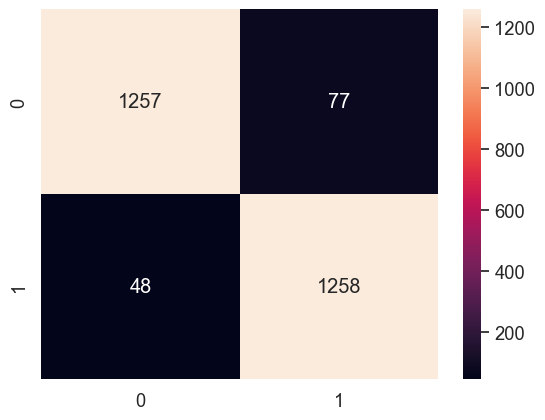

In [1052]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True ,fmt='d')

In [1053]:

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, y_pred)
print ('TN - True Negative {}'. format (cm[0,0]))
print ('FP - False Positive {}'. format (cm[0,1]))
print ('FN - False Negative {}'.format (cm[1,0]))
print('TP - True Positive {}'.format (cm[1,1]))
print('Accuracy Rate: {}'. format(np.divide (np.sum([cm [0,0],cm[1,1]]), np. sum (cm) )))
print ('Misclassification Rate: {}'.format (np.divide (np.sum([cm[0, 1], cm[1,0]]), np. sum(cm))))

TN - True Negative 1257
FP - False Positive 77
FN - False Negative 48
TP - True Positive 1258
Accuracy Rate: 0.9526515151515151
Misclassification Rate: 0.04734848484848485


In [1054]:
print('Classification Report of ANN: \n', classification_report (y_test, y_pred,digits=4))

Classification Report of ANN: 
               precision    recall  f1-score   support

           0     0.9632    0.9423    0.9526      1334
           1     0.9423    0.9632    0.9527      1306

    accuracy                         0.9527      2640
   macro avg     0.9528    0.9528    0.9527      2640
weighted avg     0.9529    0.9527    0.9527      2640



In [254]:
predictions_val = model.predict(x_test)

43/43 [==============================] - 0s 2ms/step


In [267]:
x_pred = model.predict(x_train)

413/413 [==============================] - 1s 2ms/step


In [260]:
predictions_val = model.predict(x_test)
predictions_train = model.predict(x_train)
print('Validation Predicted labels: ', predictions_val)
print('Valdation Actual labels:    ' ,y_test)

print('Training Predicted labels: ', predictions_train)
print('Training Actual labels:    ' ,y_train)

413/413 [==============================] - 1s 2ms/step
Validation Predicted labels:  [[0.08232483]
 [0.08232483]
 [0.08232483]
 ...
 [0.6029268 ]
 [0.17206949]
 [0.08232483]]
Valdation Actual labels:     239     0
2850    0
2687    0
6500    1
2684    0
       ..
1357    0
3946    0
5491    0
2112    0
6423    0
Name: Bankrupt, Length: 1364, dtype: int64
Training Predicted labels:  [[0.99071664]
 [0.08232483]
 [0.89467263]
 ...
 [0.94021535]
 [0.98438275]
 [0.9833124 ]]
Training Actual labels:     0        1
1        1
2        1
3        1
4        1
        ..
13193    1
13194    1
13195    1
13196    1
13197    1
Name: Bankrupt, Length: 13198, dtype: int64


Accuracy over Train and Test Data


In [257]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [269]:
print('Accuracy for validation data: ', accuracy_score(y_test, y_pred)) 


Accuracy for validation data:  0.9347507331378299


Classification Report on the training and validation sets.

In [270]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))
print('Train Data Classification Report \n', classification_report(y_train, predictions_train))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Precision, Recall and F1 Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predictions_val))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predictions_train))

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:",precision_score(y_test, predictions_val))
print("Overall Recall:",recall_score(y_test, predictions_val))
print('\nTrain Data Metrics\n')
print("Overall Precision:",precision_score(y_train, predictions_train))
print("Overall Recall:",recall_score(y_train, predictions_train))

In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print('\nValidation Data Confusion Matrix')
val_cm = confusion_matrix(y_test, predictions_val)
print (val_cm)

# Print the confusion matrix
print('\nTrain Data Confusion Matrix')
train_cm = confusion_matrix(y_train, predictions_train)
print (train_cm)

In [ ]:
y_val_scores = lgr_classifier.predict_proba(X_test)
print(y_val_scores)

y_train_scores = lgr_classifier.predict_proba(X_train)
print(y_train_scores)

ROC and AUC over validation data


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
resultsLogisticRegression = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['LogisticRegression'])
resultsLogisticRegression

In [ ]:
cm = metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()